##**Final Python Notebook 2 : Classification Modelling & Hyperparameter Tuning**


**Author:** Ashalya Nelson Paranagama

**Code Peer Reviewer:** Dinuli Hasara Hendawitharana

**Date of Peer Review:** 11 March 2025

###Code reused from: Seminar Session 1 and 2 and 3 – Data Loading and Libraries

In [ ]:
# Importing necessary libraries

# For data manipulation and analysis
import pandas as pd

# For numerical computations
import numpy as np

# For splitting the data and tuning hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualization (confusion matrix)
import seaborn as sns

# For plotting
import matplotlib.pyplot as plt

#Scale Input variables
from sklearn.preprocessing import StandardScaler

# Import the imputer
from sklearn.impute import SimpleImputer

#To plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#The Classification Metrices Report
from sklearn.metrics import classification_report

# Import the RocCurveDisplay class from sklearn.metrics
from sklearn.metrics import RocCurveDisplay

###Code reused from: Seminar Session 1 and 2 – Data Loading and Initial Exploration

In [ ]:
# Load Prepared Data
# Load cleaned dataset from Notebook 1
classification_df = pd.read_csv("/content/drive/MyDrive/ML/CW/Classification_Mortality_Dataset.csv")

### Code reused from: Seminar Session 1 and 2 – Displays the first few rows of the dataset to get an idea of the structure

In [ ]:
# Check the first few rows to understand the dataset
classification_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


In [ ]:
# Basic info
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4001 non-null   float64
 1   Sex                     4001 non-null   int64  
 2   T_Stage                 4001 non-null   int64  
 3   N_Stage                 4001 non-null   int64  
 4   6th_Stage               4001 non-null   int64  
 5   Differentiated          4001 non-null   int64  
 6   Grade                   4001 non-null   int64  
 7   A_Stage                 4001 non-null   int64  
 8   Tumor_Size              4001 non-null   float64
 9   Estrogen_Status         4001 non-null   int64  
 10  Progesterone_Status     4001 non-null   int64  
 11  Regional_Node_Examined  4001 non-null   float64
 12  Reginol_Node_Positive   4001 non-null   int64  
 13  Mortality_Status        4001 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

In [ ]:
# Shape of the dataset
print("Shape:", classification_df.shape)

Shape: (4001, 14)


In [ ]:
# Summary statistics
classification_df.describe()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,54.000000,0.004749,1.782554,1.437391,2.405649,1.847288,2.152712,0.977506,29.286178,0.932767,0.826543,14.233692,4.148463,0.153462
std,8.962589,0.068756,0.764006,0.692922,1.247060,0.637513,0.637513,0.148303,17.704246,0.250457,0.378689,7.682098,5.098083,0.360477
min,30.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,0.000000
50%,54.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,0.000000
75%,61.000000,0.000000,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,0.000000
max,69.000000,1.000000,4.000000,3.000000,5.000000,3.000000,4.000000,1.000000,71.000000,1.000000,1.000000,34.000000,46.000000,1.000000


In [ ]:
# Column names
print("Columns:", classification_df.columns.tolist())

Columns: ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Mortality_Status']


### Code reused from: Seminar Session 1 and 2 – Dropping the 'Sex' column from the *dataset*

In [ ]:
#Droping 'Sex' variable from the dataset
classification_data = classification_df.drop('Sex', axis=1)
classification_data.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


### Code reused from: Seminar Session 1 and 2 – Selecting Features: Split columns into two types of variables Independant (Feature) or Dependant (Target) variables

In [ ]:
#Split dataset in Features and Target variable
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = classification_data[feature_cols] #Features
y = classification_data.Mortality_Status #Target variable

### Code reused from: Seminar Session 1 and 2 – Scale the Input Variables

In [ ]:
#Scale Input variables
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

### Code reused from: Seminar Session 1 and 2 – Splitting Data into Training and Tests Sets

In [ ]:
#Split X and y into Training and Testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

#Display the data value dimensions
print('Whole Data Shape: ', classification_data.shape)
print('X1_train Shape: ', X1_train.shape)
print('X1_test Shape: ', X1_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape: ', y_test.shape)

Whole Data Shape:  (4001, 13)
X1_train Shape:  (3000, 12)
X1_test Shape:  (1001, 12)
y_train Shape:  (3000,)
y_test Shape:  (1001,)


### Code reused from: Seminar Session 1 and 2 – Instantiate the Model - Creating a Logistic Regression classifier object and Fitting the model on the trai set and perform prediction on the test set

In [ ]:
#Instantiate the Model (Using the default parameters)
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X1_train, y_train)
y_pred = logreg.predict(X1_test)

In [ ]:
#To see the predicted values
y_pred

array([0, 0, 1, ..., 0, 0, 1])

### Code reused from: Seminar Session 1 and 2 – Viewing the predicted values for the test dataset

In [ ]:
# Re-split X and y into Training and Testing sets using the processed data X1
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

### Code reused from: Seminar Session 1 and 2 – Creating a comparison_df and save it to make a visual comparision between the predicted mortality status and actual mortality status

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (example: KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
#To make a visual comparison between the predicted Mortality_Status and the actual Mortality_Status values
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test, 'Predicted Mortality_Status' : y_pred})
#Save the Comparison as a CSV file
Comparison_df.to_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Comparison_df.csv', index=True)
Comparison_df.head()

,Actual Mortality_Status,Predicted Mortality_Status
555,0,0
2793,0,0
527,0,0
3871,1,0
2990,0,0


### Code reused from: Seminar Session 1 and 2 – Expanding the display options in Pandas to view all the number of instances

In [ ]:
#In order to view all the predictions with truncation view
pd.set_option('display.max_rows', 1001)
pd.set_option('display.max_columns', 1001)
pd.set_option('display.width', 1001)

In [ ]:
#Display Comparison_df
Comparison_df

,Actual Mortality_Status,Predicted Mortality_Status
555,0,0
2793,0,0
527,0,0
3871,1,0
2990,0,0
70,0,0
2554,0,0
211,0,1
196,0,0
803,0,0


### Code reused from: Seminar Session 1 and 2 – Model Evaluation using Confusion Matrix

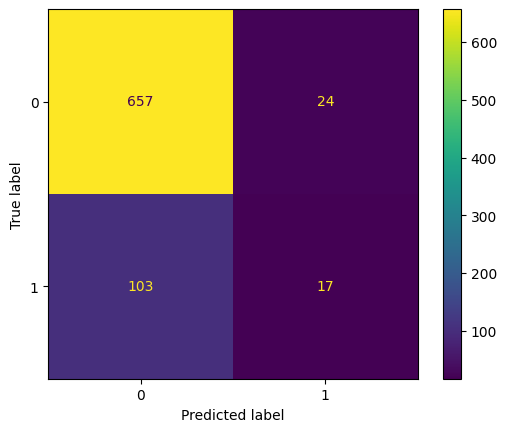

In [ ]:
#Construct the Confusion Matrix cm
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

#Create a display to plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

### Code reused from: Seminar Session 1 and 2 – Calculating the machine learning Logistic Regression model Accuracy

In [ ]:
#Apply the function to find the correct predictions
accuracy = accuracy_score(y_test, y_pred)
#Display the accuracy
print('The Logistic Regression Model Accuracy: ', accuracy)

The Logistic Regression Model Accuracy:  0.8414481897627965


### Code reused from: Seminar Session 1 and 2 –  Generating the Classification Metrics Report

In [ ]:
print(classification_report(y_test, y_pred))

#Display the accuracy
print('The Logistic Regression Model Accuracy: ', accuracy)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       681
           1       0.41      0.14      0.21       120

    accuracy                           0.84       801
   macro avg       0.64      0.55      0.56       801
weighted avg       0.80      0.84      0.81       801

The Logistic Regression Model Accuracy:  0.8414481897627965


### Code reused from: Seminar Session 1 and 2 – Generating the ROC Curve

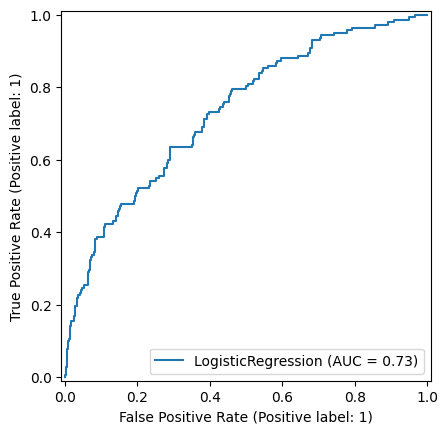

In [ ]:
# Assuming you want to use the split from cell 25 (test_size=0.25, random_state=1):
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

# Now use the consistent X1_test and y_test:
Logreg_roc = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)

### Code reused from: Seminar Session 1 and 2 – Define the Logistic Regression Model

In [ ]:
# Define the logistic regression model (you can keep solver as 'liblinear' for small datasets)
logreg = LogisticRegression()

### Code reused from: Pedregosa, F. et al., 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html [Accessed 1 May 2025].

In [ ]:
# Create a dictionary of hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],                      # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                 # Inverse of regularization strength (lower = stronger regularization)
    'solver': ['liblinear', 'saga'],              # Solvers that support l1/l2
    'max_iter': [100, 200, 500],                   # Maximum number of iterations to converge
    'class_weight': [None, 'balanced']
}

In [ ]:
# Create the GridSearchCV object
# cv=5 means 5-fold cross-validation
# scoring='accuracy' means it selects the best model based on highest accuracy
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

### Code reused from: Seminar Session 1 and 2 – Fit the GridSearchCV on Train Data

In [ ]:
# Fit the GridSearchCV on training data
grid_search.fit(X1_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

### Code reused from: Seminar Session 3 – Printing the best parameters found by GridSearchCV

In [ ]:
# Print the best parameters found by GridSearchCV
print("Best Hyperparameters found:\n", grid_search.best_params_)

Best Hyperparameters found:
 {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


### Code reused from: Seminar Session 3 – Use the best Estimator to make predictions on Test Data

In [ ]:
# Use the best estimator to make predictions on the test set
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X1_test)

### Code reused from: Seminar Session 1 and 2 – Evaluating the Hyper-Tuned LR Model Using Accuracy Score

In [ ]:
# Accuracy of the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy of Optimized Logistic Regression:", best_accuracy)

Accuracy of Optimized Logistic Regression: 0.8641358641358642


### Code reused from: Seminar Session 1 and 2 – Evaluating the Hyper-Tuned LR Model using Classification Report

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.93       859
           1       0.58      0.15      0.24       142

    accuracy                           0.86      1001
   macro avg       0.73      0.57      0.58      1001
weighted avg       0.83      0.86      0.83      1001



### Code reused from: Seminar Session 1 and 2 – Evaluating the Hyper-Tuned LR Model using Confusion Matrix

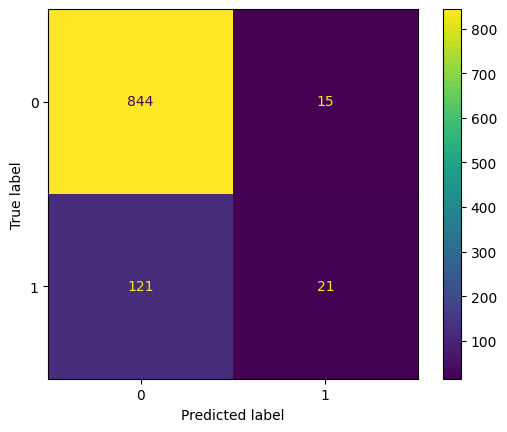

In [ ]:
# Confusion matrix
best_cm = confusion_matrix(y_test, y_pred_best)
best_disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_logreg.classes_)
best_disp.plot()

### Code reused from: Seminar Session 1 and 2 – Evaluating the Hyper-Tuned LR Model using ROC Curve

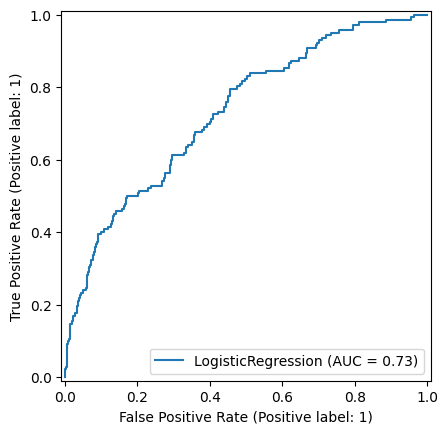

In [ ]:
# ROC Curve for the optimized model
RocCurveDisplay.from_estimator(best_logreg, X1_test, y_test)

### Code reused from:

In [ ]:
# Convert results into a DataFrame for easier analysis
results_df = pd.DataFrame(grid_search.cv_results_)
# Show top 5 results sorted by mean test score
results_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.024746,0.002292,0.002088,0.000055,0.01,None,100,l2,saga,"{'C': 0.01, 'class_weight': None, 'max_iter': ...",0.846667,0.865,0.846667,0.851667,0.850000,0.852000,0.006782,1
7,0.025121,0.002927,0.002636,0.000918,0.01,None,200,l2,saga,"{'C': 0.01, 'class_weight': None, 'max_iter': ...",0.846667,0.865,0.846667,0.851667,0.850000,0.852000,0.006782,1
11,0.022715,0.002125,0.001990,0.000045,0.01,None,500,l2,saga,"{'C': 0.01, 'class_weight': None, 'max_iter': ...",0.846667,0.865,0.846667,0.851667,0.850000,0.852000,0.006782,1
24,0.011798,0.001744,0.002156,0.000252,0.10,None,100,l1,liblinear,"{'C': 0.1, 'class_weight': None, 'max_iter': 1...",0.850000,0.865,0.845000,0.846667,0.851667,0.851667,0.007071,4
28,0.009485,0.000531,0.002050,0.000123,0.10,None,200,l1,liblinear,"{'C': 0.1, 'class_weight': None, 'max_iter': 2...",0.850000,0.865,0.845000,0.846667,0.851667,0.851667,0.007071,4


## **Gaussian Naive Bayes Classifier Modelling**

In [ ]:
#Load the dataset
gnb_data = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Dataset.csv')

### Code reused from: Seminar Session 3 – Understand and Explore the Dataset

In [ ]:
#Displaying the first five rows of the dataset
gnb_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


### Code reused from: Seminar Session 3 – Explore the columns and the datatypes for each columns in the dataset

In [ ]:
#Identifying data types of the variables
gnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4001 non-null   float64
 1   Sex                     4001 non-null   int64  
 2   T_Stage                 4001 non-null   int64  
 3   N_Stage                 4001 non-null   int64  
 4   6th_Stage               4001 non-null   int64  
 5   Differentiated          4001 non-null   int64  
 6   Grade                   4001 non-null   int64  
 7   A_Stage                 4001 non-null   int64  
 8   Tumor_Size              4001 non-null   float64
 9   Estrogen_Status         4001 non-null   int64  
 10  Progesterone_Status     4001 non-null   int64  
 11  Regional_Node_Examined  4001 non-null   float64
 12  Reginol_Node_Positive   4001 non-null   int64  
 13  Mortality_Status        4001 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

### Code reused from: Seminar Session 3 – Dropping the 'Sex' column of the dataset

In [ ]:
#Droping 'Sex' variable from the dataset
gnb_data = gnb_data.drop('Sex', axis=1)
gnb_data.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


### Code reused from: Seminar Session 3 – Performing Min-Max Normalisation to scale all the Input features values between 0 and 1

In [ ]:
#Perform Minimum-Maximum Normalization
X1 = (X - np.min(X)) / (np.max(X) - np.min(X))

### Code reused from: Seminar Session 3 – Splitting the Dataset into Training set and Testing set

In [ ]:
#Split the dataset into Training and Testing
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

### Code reused from: Seminar Session 3 – Build a Naive Bayes Model for Classification Mortality Status Prediction


In [ ]:
#Build a Naive Bayes Model for Mortality_Status Prediction
gnb = GaussianNB()
gnb.fit(X1_train, y_train)
y_pred = gnb.predict(X1_test)

### Code reused from: Seminar Session 3 – Evaluate the Naive Bayes Model by Generating Classification Report

In [ ]:
#Classification Report for Naive Bayes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       852
           1       0.41      0.44      0.43       149

    accuracy                           0.82      1001
   macro avg       0.66      0.67      0.66      1001
weighted avg       0.83      0.82      0.83      1001



### Code reused from: Seminar Session 3 – Evaluate the Naive Bayes Model by Creating Confusion Matrix

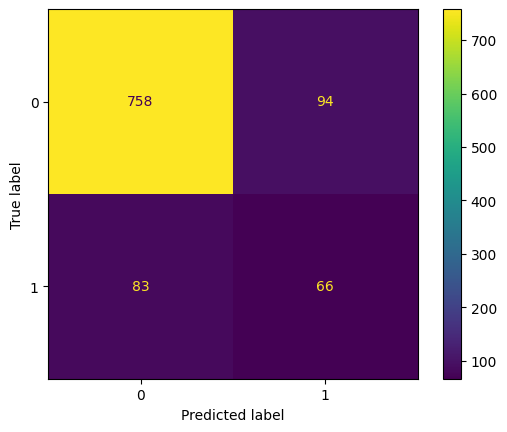

In [ ]:
#Creating Confusion Matrix
gnb_cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
gnb_cm = ConfusionMatrixDisplay(gnb_cm, display_labels = gnb.classes_)
gnb_cm.plot()

### Code reused from: Seminar Session 3 – Evaluate the Naive Bayes Model by Creating the ROC Curve

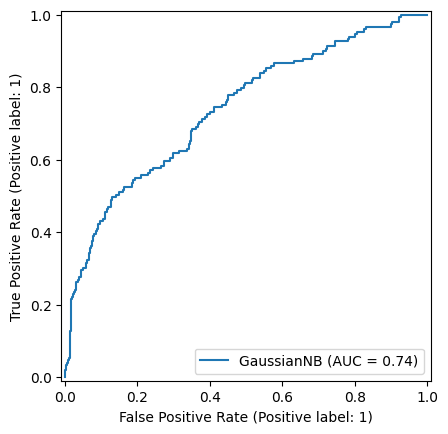

In [ ]:
#ROC Curve
gnb_roc = RocCurveDisplay.from_estimator(gnb, X1_test, y_test)

## **Hyperparameter Tuning for Naive Bayes Classification Mortality_Status Model**

### Code reused from: Seminar Session 3 – Define the Naive Bayes Model

In [ ]:
# Define the Naive Bayes model
gnb = GaussianNB()

### Code reused from: Pedregosa, F. et al., 2011. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html [Accessed 1 May 2025].

In [ ]:
# Create a dictionary of hyperparameters to tune
# We'll try a range of var_smoothing values on a log scale
param_grid = {
    'var_smoothing': np.logspace(-11, -7, num=10)  # 10 values from 1e-11 to 1e-7
}

In [ ]:
# Create the GridSearchCV object
# cv=5 uses 5-fold cross-validation, and scoring='accuracy' optimizes for accuracy
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

### Code reused from: Seminar Session 3 – Fit the GridSearchCV to the Train Data

In [ ]:
# Fit the GridSearchCV to the training data
grid_search.fit(X1_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-11, 2.78255940e-11, 7.74263683e-11, 2.15443469e-10,
       5.99484250e-10, 1.66810054e-09, 4.64158883e-09, 1.29154967e-08,
       3.59381366e-08, 1.00000000e-07])},
             scoring='accuracy', verbose=1)

### Code reused from: Seminar Session 3 – Printing the best Hyperparameter found

In [ ]:
# Print the best hyperparameter found
print("Best Hyperparameter for GaussianNB:\n", grid_search.best_params_)

Best Hyperparameter for GaussianNB:
 {'var_smoothing': np.float64(1e-11)}


### Code reused from: Seminar Session 3 – Get the Best Model from the Grid Search

In [ ]:
# Get the best model from the grid search
best_gnb = grid_search.best_estimator_

### Code reused from: Seminar Session 3 – Predict on Test Data using the Optimized Model

In [ ]:
# Predict on the test data using the optimized model
y_pred_best = best_gnb.predict(X1_test)

### Code reused from: Seminar Session 3 – Evaluating Hyper-Tuned NB Model using Accuracy Score

In [ ]:
# Accuracy of the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy of Optimized Naive Bayes Model:", best_accuracy)

Accuracy of Optimized Naive Bayes Model: 0.8231768231768232


### Code reused from: Seminar Session 3 – Evaluating Hyper-Tuned NB Model using Classification Report

In [ ]:
# Generate classification report (with zero_division handling)
print("Classification Report (Handled zero_division):\n")
print(classification_report(y_test, y_pred_best, zero_division=0))

Classification Report (Handled zero_division):

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       852
           1       0.41      0.44      0.43       149

    accuracy                           0.82      1001
   macro avg       0.66      0.67      0.66      1001
weighted avg       0.83      0.82      0.83      1001



### Code reused from: Seminar Session 3 – Evaluating Hyper-Tuned NB Model using Confusion Matrix

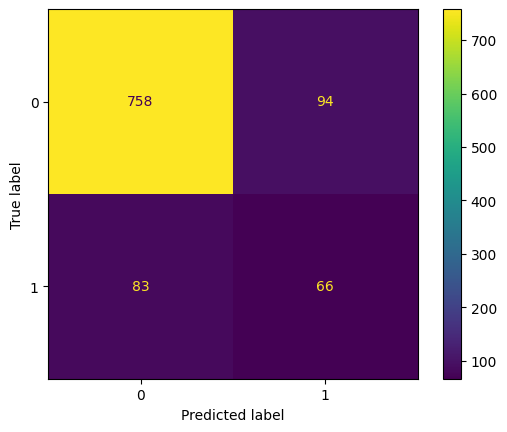

In [ ]:
# Confusion Matrix for optimized model
best_cm = confusion_matrix(y_test, y_pred_best)
best_disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_gnb.classes_)
best_disp.plot()

### Code reused from: Seminar Session 3 – Evaluating Hyper-Tuned NB Model using ROC Curve

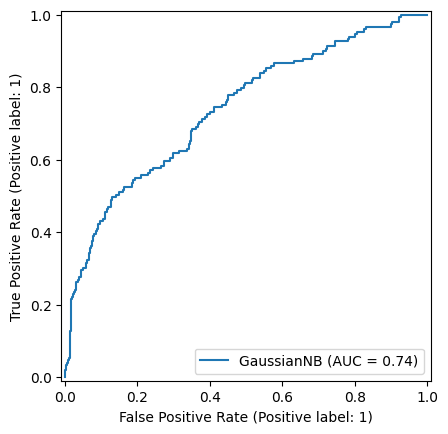

In [ ]:
# ROC Curve for optimized Naive Bayes model
RocCurveDisplay.from_estimator(best_gnb, X1_test, y_test)

### Code reused from:

In [ ]:
# View the full set of results from Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)

# Show the top-performing configurations
results_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005578,0.000245,0.003989,0.000449,1.000000e-11,{'var_smoothing': 1e-11},0.801667,0.786667,0.79,0.801667,0.795,0.795,0.006055,1
1,0.005058,0.000311,0.004168,0.000665,2.782559e-11,{'var_smoothing': 2.7825594022071258e-11},0.801667,0.786667,0.79,0.801667,0.795,0.795,0.006055,1
2,0.007607,0.004122,0.004969,0.002233,7.742637e-11,{'var_smoothing': 7.742636826811278e-11},0.801667,0.786667,0.79,0.801667,0.795,0.795,0.006055,1
3,0.007814,0.004395,0.004271,0.001118,2.154435e-10,{'var_smoothing': 2.1544346900318867e-10},0.801667,0.786667,0.79,0.801667,0.795,0.795,0.006055,1
4,0.006882,0.002420,0.003915,0.000390,5.994843e-10,{'var_smoothing': 5.994842503189421e-10},0.801667,0.786667,0.79,0.801667,0.795,0.795,0.006055,1


##**K-Nearest-Neighbours (kNN) Modelling**

### Code reused from: Seminar Session 3 – Loading the Dataset with required python libraries and Understanding the data

In [ ]:
#Load the dataset
knn_data = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Comparison_df.csv')
#Check a sample of the dataset
knn_data.head()

,Unnamed: 0,Actual Mortality_Status,Predicted Mortality_Status
0,555,0,0
1,2793,0,0
2,527,0,0
3,3871,1,0
4,2990,0,0


### Code reused from: Seminar Session 3 – List all the features names in the dataset

In [ ]:
#List all the faetures of the dataset
list(knn_data.columns)

['Unnamed: 0', 'Actual Mortality_Status', 'Predicted Mortality_Status']

### Code reused from: Seminar Session 3 – Check the number of Rows and Columns in the Dataset

In [ ]:
#check the number of rows and columns in the dataset
knn_data.shape

(801, 3)

### Code reused from: Seminar Session 3 – Explore the columns and the data types for each column in the Dataset

In [ ]:
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  801 non-null    int64
 1   Actual Mortality_Status     801 non-null    int64
 2   Predicted Mortality_Status  801 non-null    int64
dtypes: int64(3)
memory usage: 18.9 KB


### Code reused from: Seminar Session 3 – Examine the Basic Summary Stats of the Dataset Features


In [ ]:
knn_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,801.0,1924.861423,1170.583547,6.0,923.0,1876.0,2889.0,3999.0
Actual Mortality_Status,801.0,0.149813,0.357111,0.0,0.0,0.0,0.0,1.0
Predicted Mortality_Status,801.0,0.051186,0.220515,0.0,0.0,0.0,0.0,1.0


### Code reused from: Seminar Session 3 – Splitting the Dataset into Train and Test data subsets

In [ ]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (3000, 12)
X_test Instances (1001, 12)


### Code reused from: Seminar Session 3 – Building and Training the KNN Model

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

### Code reused from: Seminar Session 3 – Use the 'predict' function on KNN model to make predictions on Test Data

In [ ]:
#Perform prediction on the Test data
y_pred = knn.predict(X_test)

### Code reused from: Seminar Session 3 – Creating a dataframe for comparing the Actual Mortality status results and the Predicted Mortality status results and Save it.

In [ ]:
#Create a dataframe for comparing the actual Vs predicted results by kNN model
Compare_results_knn_df = pd.DataFrame({'Actual Mortality_Status': y_test, 'Predicted Mortality_Status': y_pred})
#Save the Comparison as a CSV file
Compare_results_knn_df.to_csv(r'/content/Knn_Comparison_df.csv', index=True)
Compare_results_knn_df

,Actual Mortality_Status,Predicted Mortality_Status
309,0,0
3436,1,0
3381,0,0
2990,0,0
3173,0,0
1311,0,0
1180,0,0
3174,0,0
2915,0,0
1258,0,0


### Code reused from: Seminar Session 3 – Evaluate the kNN model by Creating Classification Report

In [ ]:
#Creating Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       847
           1       0.39      0.10      0.16       154

    accuracy                           0.84      1001
   macro avg       0.63      0.54      0.53      1001
weighted avg       0.78      0.84      0.79      1001



### Code reused from: Seminar Session 3 – Evaluate the kNN model by Creating the Confusion Matrix

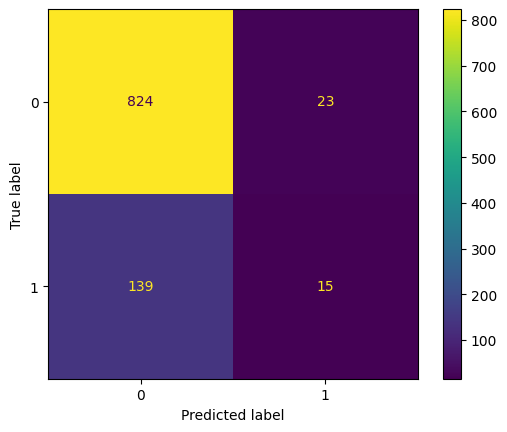

In [ ]:
#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

### Code reused from: Seminar Session 3 – Evaluate the kNN model by creating ROC Curve

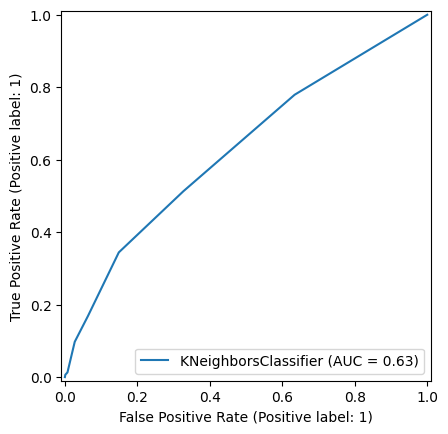

In [ ]:
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

### Code reused from: Seminar Session 3 – Rebuild the kNN model with k=18 and observe any Improvements in the evaluation results

In [ ]:
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 18)
# Fit the classifier to the data
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

### Code reused from: Seminar Session 3 – Performing the predictions on Test data

In [ ]:
#Perform predictions on the test data
y_pred=knn1.predict(X_test)

### Code reused from: Seminar Session 3 – Evaluating the kNN model after changing the k value by Creating Confusion Matrix

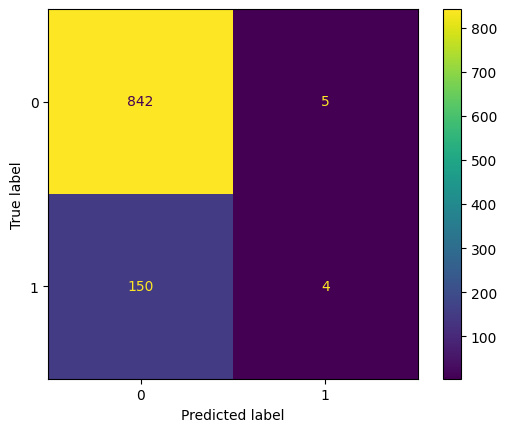

In [ ]:
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()

### Code reused from: Seminar Session 3 – Evaluating the kNN model after changing the k value by Creating Classification Report

In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       847
           1       0.44      0.03      0.05       154

    accuracy                           0.85      1001
   macro avg       0.65      0.51      0.48      1001
weighted avg       0.79      0.85      0.78      1001



### Code reused from: Seminar Session 3 – Evaluating the kNN model after changing the k value by Creating ROC Curve

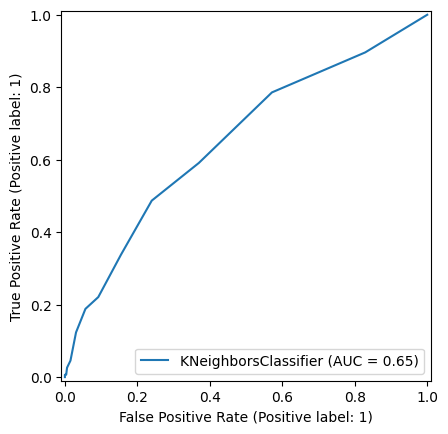

In [ ]:
knn_roc = RocCurveDisplay.from_estimator(knn1, X_test, y_test)

##**Hyperparameter Tuning for kNN Classification Mortality_Status Model**

### Code reused from: Seminar Session 3 – Improving the kNN model's performance with Hyperparameter Tuning

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

### Code reused from: Seminar Session 3 – View the best combination of parameters for the hyper-tuned model

In [ ]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(17)}

### Code reused from: Seminar Session 3 – Perform predictions on the Test Dataset with the newly formed hyper-tuned model. Evaluate hyper-tuned model's performance by Creating Confusion Matrix

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       847
           1       0.60      0.06      0.11       154

    accuracy                           0.85      1001
   macro avg       0.73      0.53      0.51      1001
weighted avg       0.81      0.85      0.79      1001



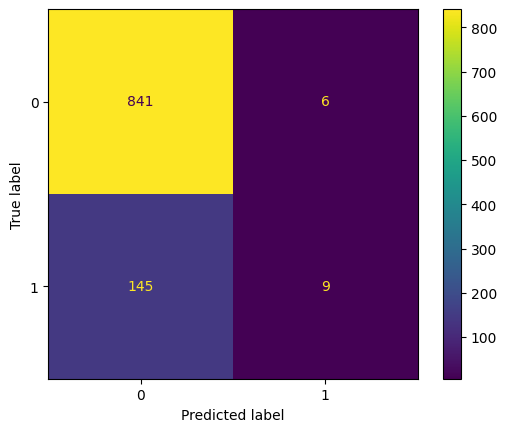

In [ ]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

### Code reused from: Seminar Session 3 – Evaluate hyper-tuned model's performance by Creating ROC Curve

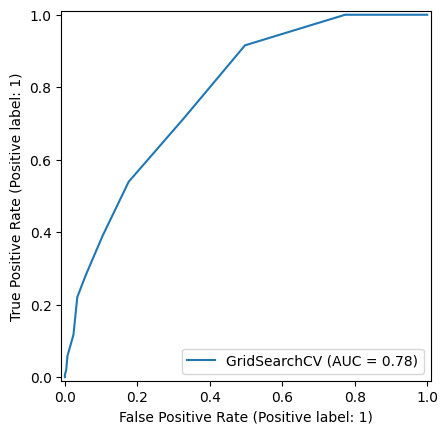

In [ ]:
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Dataset.csv')

# Define features (X) and target (y)
# Replace 'feature_columns' and 'target_column' with your actual column names
feature_columns = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = data[feature_columns]
y = data['Mortality_Status'] # Assuming 'Mortality_Status' is your target column

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (death)

# Evaluation
print("Logistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Metrics
Accuracy: 0.8614232209737828
Precision: 0.6956521739130435
Recall: 0.13333333333333333
F1-score: 0.22377622377622378
AUC-ROC: 0.7437224669603525


In [ ]:
# Assuming you have X_train and y_train from your data split
best_gnb = GaussianNB()  # Replace with your specific Naive Bayes model setup
best_gnb.fit(X_train, y_train)  # Train your model

# Now, you should be able to continue with the prediction:
y_pred_nb = best_gnb.predict(X_test)  # Make predictions on the test set
y_proba_nb = best_gnb.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1


print("\nNaive Bayes Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_nb))  # Use predicted probabilities


Naive Bayes Metrics
Accuracy: 0.8214731585518102
Precision: 0.4094488188976378
Recall: 0.43333333333333335
F1-score: 0.42105263157894735
AUC-ROC: 0.7261502692119431


In [ ]:
# Assuming you have X_train, y_train, X_test, and y_test from your data split
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_gscv.fit(X_train, y_train)  # Train your KNN model

# Now, make predictions and get probabilities:
y_pred_knn = knn_gscv.predict(X_test)  # Make predictions on the test set
y_proba_knn = knn_gscv.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1 (if applicable)

# Print KNN Metrics
print("\nKNN Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_knn))  # Use predicted probabilities


KNN Metrics
Accuracy: 0.8476903870162297
Precision: 0.3333333333333333
Recall: 0.016666666666666666
F1-score: 0.031746031746031744
AUC-ROC: 0.6744309838472834
